# Computer Vision

### [Resource](https://www.learnpytorch.io/03_pytorch_computer_vision/)

Computer vision is the art of teaching a computer to see.

For example:
- Building a model to classify whether a photo is of a cat or a dog (Binary Classification).
- Whether a photo is of a cat, dog or chicken (Multi-class Classification).
- Identifying where a car appears in a video frame ([Object Detection](https://en.wikipedia.org/wiki/Object_detection)).
- Figuring out where different objects in an image can be separated ([Panoptic Segmentation](https://arxiv.org/abs/1801.00868)).

<img src = 'https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-problems.png'>

## Where does computer vision get used?

- If you use a smartphone, you've already used computer vision.
- Camera and photo apps use computer vision to enhance and sort images.
- Modern cars use computer vision to avoid other cars and stay within lane lines.
- Manufacturers use computer vision to identify defects in various products.
- Security cameras use computer vision to detect potential intruders.



## Content to Cover in Computer Vision
<img src = 'https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-pytorch-computer-vision-workflow.png'>

| Topic | Contents |
|-------|----------|
| 0. Computer Vision Libraries in PyTorch | PyTorch has useful built-in computer vision libraries. |
| 1. Load Data | Start with images of clothing from [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). |
| 2. Prepare Data | Load images with [PyTorch DataLoader](https://pytorch.org/docs/stable/data.html) for training. |
| 3. Model 0: Baseline Model | Create a multi-class classification model with a chosen loss function and optimizer. |
| 4. Predictions and Evaluation | Test baseline model predictions and assess performance. |
| 5. Device Agnostic Code | Write flexible, device-agnostic code. |
| 6. Model 1: Adding Non-linearity | Improve baseline model with non-linear layers. |
| 7. Model 2: CNN | Introduce [Convolutional Neural Network (CNN)](https://www.happiestminds.com/insights/convolutional-neural-networks-cnns/#:~:text=Within%20Deep%20Learning%2C%20a%20Convolutional,image%20by%20using%20a%20CNN.) architecture. |
| 8. Compare Models | Compare the three models built. |
| 9. Evaluate Best Model | Assess performance on random images using the best model. |
| 10. Confusion Matrix | Create and interpret a confusion matrix for model evaluation. |
| 11. Save/Load Best Model | Save and load the best-performing model for future use. |

## 0. Computer Vision Libraries in PyTorch
| PyTorch Module                | What it Does                                                                        |
|-------------------------------|-------------------------------------------------------------------------------------|
| [`torchvision`](https://pytorch.org/vision/stable/index.html)                 | Contains datasets, model architectures, and image transformations for computer vision. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html)        | Provides example computer vision datasets and base classes for custom datasets.        |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html)     | Contains well-performing and commonly used computer vision model architectures.       |
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html)     | Offers common image transformations needed before using images with a model.          |
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)   | Base dataset class in PyTorch for creating custom datasets.                           |
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data)  | Creates a Python iterable over a dataset, facilitating easy iteration during training. |



In [50]:
# Import torch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

import numpy as np
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

# Setting up device agnostic code
device = 'cuda' if torch.cuda.is_available else 'cpu'
print(device)

2.1.0+cu121
0.16.0+cu121
cuda


## 1. Load Data
Loading up data of [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html) (Modified National Institute of Standards and Technology) Datasets which contains grayscale images of 10 different kinds of clothing.

<img src = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-fashion-mnist-slide.png">

Also there are other datasets available in [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html)

*The [original MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset contains thousands of examples of handwritten digits (from 0 to 9) and was used to build computer vision models to identify numbers for postal services.*


In [51]:
# Setting up training data (Look up documentation of torchvision.datasets.FashionMNIST)
train_data = datasets.FashionMNIST(root = "data",   # Storage location of dataset
                                   train = True,    # Indication of downloading train_datasets
                                   download = True,   # Flag to set for downloading datasets
                                   transform = torchvision.transforms.ToTensor(),   # Transform image datasets to tensors
                                   target_transform = None)   # Flag to set for transformation of labels/targets

# Setting up tests data
test_data = datasets.FashionMNIST(root = "data",
                                  train = False,   # Indication of downloading test_datasets
                                  download = True,
                                  transform = torchvision.transforms.ToTensor(),
                                  target_transform = None)

In [52]:
len(train_data), len(test_data)

(60000, 10000)

### [Documentation for torchvision.transforms.ToTensor()](https://pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html)

It converts a PIL Image or ndarray to tensor and scale the values accordingly.

In [53]:
# See first training data and labels
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [54]:
# Class names/labels of train_datasets from FashionMNIST
class_name = train_data.classes
class_name, len(class_name)

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 10)

In [55]:
# Mapping classes to dictionary indices
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

### 1.1 Checking imput and output shapes

In [56]:
print(f'Image Shape: {image.shape}, label class_name and output shape: {class_name[label], label}')

Image Shape: torch.Size([1, 28, 28]), label class_name and output shape: ('Ankle boot', 9)


The shape of the image tensor is [1, 28, 28] or more specifically:

```python
[color_channels=1, height=28, width=28]
```

Having `color_channels = 1` means the image is grayscale. If `color_channels = 3`,  means the image is RGB.

<img src ="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-input-and-output-shapes.png">

### 1.2 Visualizing data using `matplotlib.pyplot`

Image Shape: torch.Size([1, 28, 28])


TypeError: Invalid shape (1, 28, 28) for image data

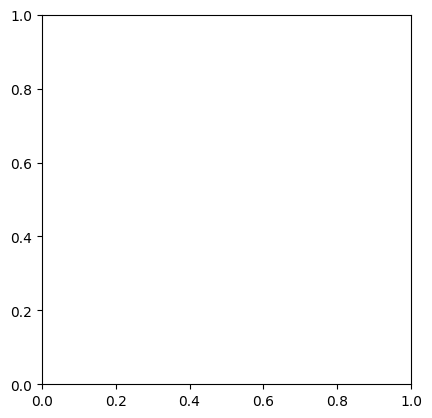

In [58]:
image, label = train_data[0]
print(f'Image Shape: {image.shape}')
plt.imshow(image)

Above Error happened because `matplotlib.pylot` expects the image tensor array values to be
- either in `[height, width, color_channels]` format
  ```python
  [height=28, width=28, color_channels=1]
  ```
- or in `[height, width]` format, `no color_channels` at all

Image Shape: torch.Size([1, 28, 28])
After Squeeze, Image Shape: torch.Size([28, 28])


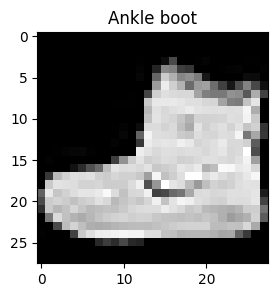

In [59]:
image, label = train_data[0]
print(f'Image Shape: {image.shape}')
print(f'After Squeeze, Image Shape: {image.squeeze().shape}')
plt.figure(figsize = (3, 3))
plt.imshow(image.squeeze(), cmap = "gray")    # cmap="gray" to generate image on grayscale
plt.title(class_name[label]);

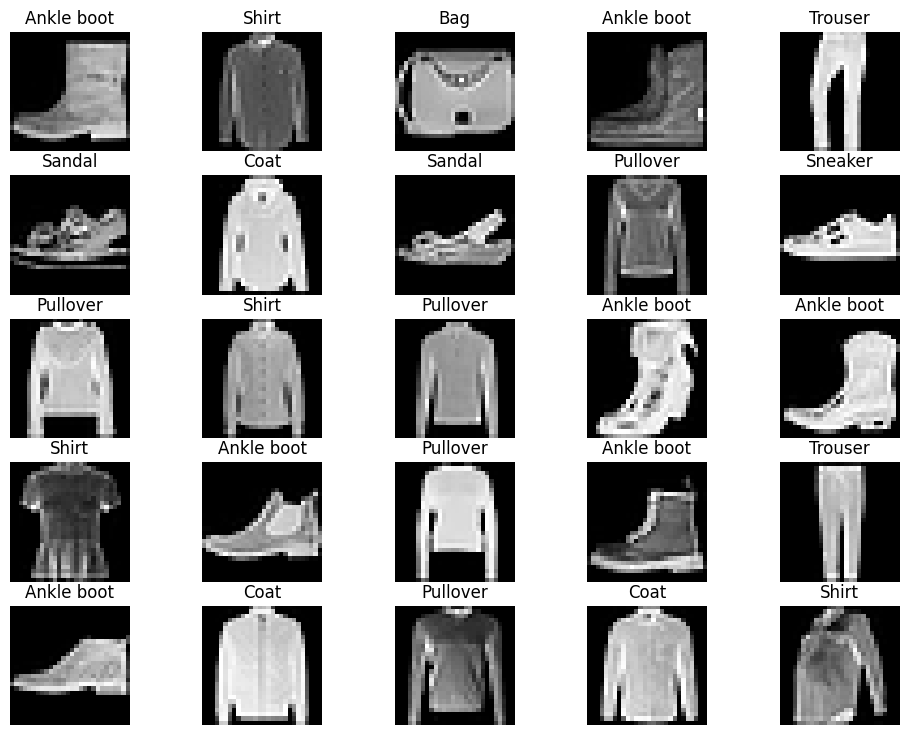

In [60]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize = (12, 9))
rows, cols = 5, 5

for i in range(1, rows*cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  # print(random_idx)
  image, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap = "gray")    # cmap="gray" to generate image on grayscale
  plt.title(class_name[label])
  plt.axis(False);

## 2. Prepare Data
The next step in your PyTorch workflow is to prepare your dataset with [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset), or `DataLoader` for short.

`DataLoader` facilitates loading data into a model for both training and inference. It transforms a large dataset into a Python iterable of smaller chunks, known as batches or mini-batches, with the `batch_size` parameter. This is because, the computational hardware may not be able to store thousands of images in one hit.

### What's a good batch size?

A common starting point for the batch size is 32, which proves effective for a variety of machine learning problems. But since this is a value you can set (a **hyperparameter**) you can try all different kinds of values, though generally powers of 2 are used most often (e.g. 32, 64, 128, 256, 512).

<img src = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-batching-fashionmnist.png">

### [Lecture about Mini Batches](https://www.youtube.com/watch?v=4qJaSmvhxi8)

In [61]:
# Import Dataloader
from torch.utils.data import DataLoader

# Setup batch_size
BATCH_SIZE = 32

# Turn datasets into batches
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                              batch_size = BATCH_SIZE,
                              shuffle = False)

print(f'Dataloaders: {train_dataloader, test_dataloader}')
print(f'Length of Train Dataloaders:: {len(train_dataloader)} with batches {BATCH_SIZE}')
print(f'Length of Test Dataloaders: {len(test_dataloader)} with batches {BATCH_SIZE}')

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7b88f0257d30>, <torch.utils.data.dataloader.DataLoader object at 0x7b88f0257760>)
Length of Train Dataloaders:: 1875 with batches 32
Length of Test Dataloaders: 313 with batches 32


In [62]:
# Checking what's inside training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

## 3. Model 0: Baseline Model

When starting to build a series of machine learning modelling experiment, it's best practice to start with a **baseline model** . A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

So to build a simple baseline model we wil be using PyTorch's `nn.Module`. This initial model will consist of two [`nn.Linear()`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) layers. However, since we're dealing with image data, we'll start with the [`nn.Flatten()`](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) layer to **compress tensor dimensions** into a **single vector**.

In [63]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)   # Perform forward pass

# Print
print(f'Before flatten: {x.shape}')      # [color_channels, height, width]
print(f'After flatten: {output.shape}')  # [color_channels, height*width]

Before flatten: torch.Size([1, 28, 28])
After flatten: torch.Size([1, 784])


In [64]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0196, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0157, 0.0000, 0.0157, 0.0039, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0039, 0.0000, 0.1490, 0.4667, 0.5098, 0.5373, 0.4941, 0.4824, 0.5137,
        0.5490, 0.5137, 0.1294, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0118, 0.0039,
        0.0157, 0.0000, 0.2353, 0.5255, 0.1765, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0235, 0.1686, 0.4745, 0.3647, 0.0000, 0.0314, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [65]:
# Building model class
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_shape, hidden_units),  # nn.Linear(in_features, out_features)
        nn.Linear(hidden_units, output_shape)
        )

  def forward(self, x):
    return self.layer_stack(x)

In [66]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape = 784,  # 28*28
    hidden_units = 16,  # hidden neural networks
    output_shape = len(class_name)  # which is 10 labels
    ).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=16, bias=True)
    (2): Linear(in_features=16, out_features=10, bias=True)
  )
)

In [67]:
# Checking a sample through forward pass on FashionMNISTModelV0
dummy_x = torch.rand([1, 1, 28, 28])

model_0(dummy_x)

tensor([[ 0.0599, -0.0578, -0.1531, -0.3557, -0.1761,  0.0471,  0.2426, -0.5298,
         -0.0458, -0.0342]], grad_fn=<AddmmBackward0>)

### 3.1 Setting up loss_fn, optimizer and evaluation metrics

- **loss_fn** : since, we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
- **optimizier** : using `nn.torch.optim.SGD()`
- **evaluation metric** : since, we're working on a classification problem, lets use accuracy as evaluation metric




In [68]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)

In [69]:
!pip install torchmetrics

In [70]:
from torchmetrics import Accuracy

torchmetrics_accuracy = Accuracy(task = 'multiclass',
                                 num_classes = len(class_name)).to('cpu')

### 3.2 Creating a function to time our experiments

Two main things to often track are:
- Model's performance (loss and accuracy values)
- How fast it runs  

In [71]:
from timeit import default_timer as timer

def train_time(start: float,
               end: float,
               device: torch.device = None):
  """Prints difference between start and end time"""
  total_time = end - start
  print(f'Trained on {device}: {total_time:.3f} seconds')
  return total_time

In [72]:
start_time = timer()
# some code ...
end_time = timer()

train_time(start = start_time, end = end_time, device = 'cpu')

Trained on cpu: 0.000 seconds


6.0976000042956e-05

### 3.3 Creating a training loop and training model on batches of data

- Loop through epochs
- Loop through training batches, perform training steps, calculate train loss/batch
- Loop through testing batches, perform testing steps, calculate test loss/batch
- Print out progress
- Time it all


In [73]:
# Progress bar
from tqdm.auto import tqdm

# Set seed and start the timer
torch.manual_seed(42)
train_time_start_cpu = timer()

# Set the no of epochs
epochs = 3

# Create training and tests loop
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n--------------')
  # Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1) Forward pass
    y_pred = model_0(X)

    # 2) Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss    # Accumulate train loss

    # 3) Optimizer zero grad
    optimizer.zero_grad()

    # 4) Loss Backward
    loss.backward()

    # 5) Optimizer step
    optimizer.step()

    # Print out
    if batch % 400 == 0:
      print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples')

  # Divide total train loss by length of train_dataloader
  train_loss /= len(train_dataloader)

  # Testing
  test_loss, test_acc = 0, 0

  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1) Forward pass
      test_pred = model_0(X_test)


      # 2) Calculate the loss
      test_loss += loss_fn(test_pred, y_test)


      # 2) Calculate the accuracy
      test_acc += torchmetrics_accuracy(y_test, test_pred.argmax(dim = 1)) * 100

    # Calculate the test loss avg per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc avg. per batch
    test_acc /= len(test_dataloader)

  # Print out
  print(f'\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} --- Test acc: {test_acc:.2f}%')

# Calculate training time
train_time_end_cpu = timer()
total_train_time_model_0 = train_time(train_time_start_cpu,
                                      train_time_end_cpu,
                                      device = str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.8765 | Test loss: 0.6257 --- Test acc: 78.60%
Epoch: 1
--------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.5588 | Test loss: 0.5405 --- Test acc: 81.08%
Epoch: 2
--------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.5011 | Test loss: 0.5078 --- Test acc: 82.13%
Trained on cpu: 41.674 seconds


## 4. Predictions and Evaluation

In [81]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               torchmetrics_accuracy):
  """Returns a dictionary containing the results of model predicting on data_loader"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make predictions
      y_pred = model(X)

      # Accumulate loos and acc_values per batch
      loss += loss_fn(y_pred, y)
      acc += torchmetrics_accuracy(y, y_pred.argmax(dim = 1)) * 100

    # Scale loss and acc to finid the avg loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return{"model_name": model.__class__.__name__,   # only works when model was created with class
         "model_loss": loss.item(),
         "model_acc": acc.item()
         }

# Calculate model_0 results in test_dataset
model_0_results = eval_model(model_0,
                             test_dataloader,
                             loss_fn,
                             torchmetrics_accuracy)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5078018307685852,
 'model_acc': 82.12859344482422}